In [2]:
# ----------------------------------------------- #
# Import & Load CSVs
# ----------------------------------------------- #
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

woodside_df = pd.read_csv('./data/2023/cleaned/456/456_61St-Woodside_2023_cleaned.csv')
bryant_df = pd.read_csv('./data/2023/cleaned/609/609_BryantPk5Av_2023_cleaned.csv')
dekalb_df = pd.read_csv('./data/2023/cleaned/127/127_Dekalb_2023_cleaned.csv')
jay_df = pd.read_csv('./data/2023/cleaned/636/636_JayStMetrotech_2023_cleaned.csv')



In [23]:
# ----------------------------------------------- #
# JSON + FORMATTING
# ----------------------------------------------- #
import json

# -------- CHANGE THESE ----------

to_json_df = dekalb_df
save_string = "./data/2023/127.json"

# --------------------------------

to_json_df = to_json_df.drop(columns = ["transit_timestamp","month", "day", "transfers"])
to_json_df[:10]

,year,dayofweek,hour,ridership,station_complex_id,station_complex,borough
0,2023,6,0,146.0,127,DeKalb Av (L),Brooklyn
1,2023,6,1,202.0,127,DeKalb Av (L),Brooklyn
2,2023,6,2,156.0,127,DeKalb Av (L),Brooklyn
3,2023,6,3,92.0,127,DeKalb Av (L),Brooklyn
4,2023,6,4,52.0,127,DeKalb Av (L),Brooklyn
5,2023,6,5,39.0,127,DeKalb Av (L),Brooklyn
6,2023,6,6,65.0,127,DeKalb Av (L),Brooklyn
7,2023,6,7,76.0,127,DeKalb Av (L),Brooklyn
8,2023,6,8,118.0,127,DeKalb Av (L),Brooklyn
9,2023,6,9,155.0,127,DeKalb Av (L),Brooklyn


In [24]:
# ----------------------------------------------- #
# Reduce to 24hours x 7 days of week
# ----------------------------------------------- #

to_json_df =  to_json_df.groupby(by=["year", "dayofweek", "hour", "station_complex", "station_complex_id", "borough"]).mean().reset_index()

to_json_df

,year,dayofweek,hour,station_complex,station_complex_id,borough,ridership
0,2023,0,0,DeKalb Av (L),127,Brooklyn,28.100000
1,2023,0,1,DeKalb Av (L),127,Brooklyn,15.541667
2,2023,0,2,DeKalb Av (L),127,Brooklyn,9.620000
3,2023,0,3,DeKalb Av (L),127,Brooklyn,16.000000
4,2023,0,4,DeKalb Av (L),127,Brooklyn,47.538462
...,...,...,...,...,...,...,...
163,2023,6,19,DeKalb Av (L),127,Brooklyn,198.384615
164,2023,6,20,DeKalb Av (L),127,Brooklyn,138.941176
165,2023,6,21,DeKalb Av (L),127,Brooklyn,109.588235
166,2023,6,22,DeKalb Av (L),127,Brooklyn,89.500000


In [25]:
# ----------------------------------------------- #
# NORMALIZE DATA
# ----------------------------------------------- #

# Calculate the sum of each group
group_sums = to_json_df.groupby(by=["year",
                             "station_complex",
                             "station_complex_id",
                             "borough",
                             "dayofweek"])['ridership'].transform('sum')

# Divide the 'value' column by the group sums
to_json_df['normalized_value'] = to_json_df['ridership'] / group_sums

to_json_df

,year,dayofweek,hour,station_complex,station_complex_id,borough,ridership,normalized_value
0,2023,0,0,DeKalb Av (L),127,Brooklyn,28.100000,0.003693
1,2023,0,1,DeKalb Av (L),127,Brooklyn,15.541667,0.002042
2,2023,0,2,DeKalb Av (L),127,Brooklyn,9.620000,0.001264
3,2023,0,3,DeKalb Av (L),127,Brooklyn,16.000000,0.002103
4,2023,0,4,DeKalb Av (L),127,Brooklyn,47.538462,0.006247
...,...,...,...,...,...,...,...,...
163,2023,6,19,DeKalb Av (L),127,Brooklyn,198.384615,0.039897
164,2023,6,20,DeKalb Av (L),127,Brooklyn,138.941176,0.027942
165,2023,6,21,DeKalb Av (L),127,Brooklyn,109.588235,0.022039
166,2023,6,22,DeKalb Av (L),127,Brooklyn,89.500000,0.017999


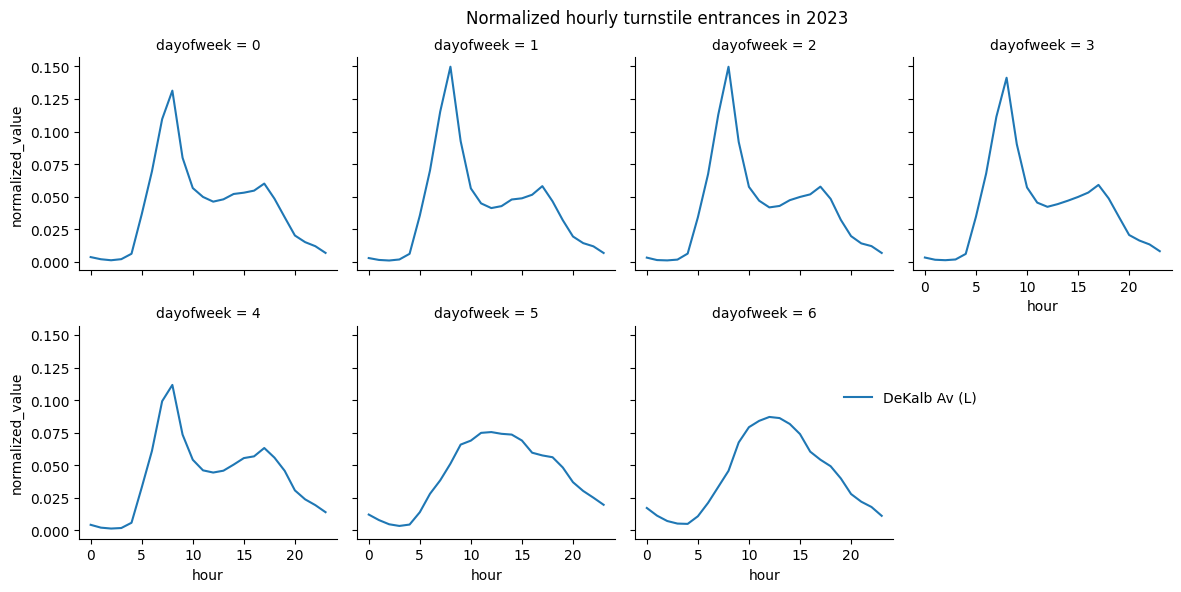

In [26]:
# ----------------------------------------------- #
# PLOT: NORMALIZED Mean Ridership, just to check
# ----------------------------------------------- #

g = sns.FacetGrid(to_json_df, col="dayofweek", col_wrap = 4)
g.map_dataframe(sns.lineplot, x="hour", y="normalized_value", hue="station_complex")
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Normalized hourly turnstile entrances in 2023')
sns.move_legend(g, "lower left", bbox_to_anchor=(.63, .3))



In [27]:
# ----------------------------------------------- #
# Add MIN & MAX
# ----------------------------------------------- #
ridership_max = to_json_df['ridership'].max()
ridership_min = to_json_df['ridership'].min()


normalized_max = to_json_df['normalized_value'].max()
normalized_min = to_json_df['normalized_value'].min()

print(ridership_max, ridership_min, normalized_max, normalized_min)


1318.1346153846155 9.096153846153847 0.1497763500048743 0.0010723410815455315


In [28]:
# ----------------------------------------------- #
# WRITE JSON
# ----------------------------------------------- #

# Data to be written
dat = {
    "station_complex": to_json_df.loc[0, 'station_complex'],
    "station_complex_id": int(to_json_df.loc[0, 'station_complex_id']), #cannot write df types e.g. int64 to json; cast to int
    "borough": to_json_df.loc[0, 'borough'],
    "year": int(to_json_df.loc[0, 'year']),
    "ridership": {
        "min": ridership_min,
        "max": ridership_max,
        "by_day": {
            "0": to_json_df.loc[to_json_df['dayofweek'] == 0]['ridership'].tolist(),
            "1": to_json_df.loc[to_json_df['dayofweek'] == 1]['ridership'].tolist(),
            "2": to_json_df.loc[to_json_df['dayofweek'] == 2]['ridership'].tolist(),
            "3": to_json_df.loc[to_json_df['dayofweek'] == 3]['ridership'].tolist(),
            "4": to_json_df.loc[to_json_df['dayofweek'] == 4]['ridership'].tolist(),
            "5": to_json_df.loc[to_json_df['dayofweek'] == 5]['ridership'].tolist(),
            "6": to_json_df.loc[to_json_df['dayofweek'] == 6]['ridership'].tolist()
        }
    },
    "ridership_norm": {
        "min": normalized_min,
        "max": normalized_max,
        "by_day": {
            "0": to_json_df.loc[to_json_df['dayofweek'] == 0]['normalized_value'].tolist(),
            "1": to_json_df.loc[to_json_df['dayofweek'] == 1]['normalized_value'].tolist(),
            "2": to_json_df.loc[to_json_df['dayofweek'] == 2]['normalized_value'].tolist(),
            "3": to_json_df.loc[to_json_df['dayofweek'] == 3]['normalized_value'].tolist(),
            "4": to_json_df.loc[to_json_df['dayofweek'] == 4]['normalized_value'].tolist(),
            "5": to_json_df.loc[to_json_df['dayofweek'] == 5]['normalized_value'].tolist(),
            "6": to_json_df.loc[to_json_df['dayofweek'] == 6]['normalized_value'].tolist()
        }
    }
}
 
# Serializing json
json_object = json.dumps(dat, indent=4)
 
# Writing
with open(save_string, "w") as outfile:
    outfile.write(json_object)